# Coursework One

This coursework is basically about linear models using the credit card dataset that we mentioned in our lectures. The data required to run this notebook is uploaded through a url in this notebook. 

You only need to fill out the parts that you are asked to do so. You can find these parts by looking for word "Exercise"  using "Ctrl+F". There are 11 excercises in total for this coursework. You may need to install certain packages in order for the code to run. Some the necessary packages are loaded below. 

Note that this notebook contains a lot of other information which is just for informative purposes, but in order to 
do the exercises you will need to understand the whole document (or at least most of it). 
You can try to explore this file.

In order to answer the questions, you need to either write some codings or write some sentences. The approximated number of lines or words requierd for coding or annswering the questions for each exercise is provided to you. You should not feel guilty if your lines of codes are longer.

Marks for each exercise are shown in brakcets; note that these marks are provisional and they might be changed.


In [1]:
# Load some necessary general utilities
# ----------------------
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd

#To import data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
# Load CSV from URL using NumPy and perform some pre-processing
np.random.seed(3)
url = "https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv"
names = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default']
df = pd.read_csv(url, names=names)
df = df.drop(['ID'], axis = 1)
names = names[1:np.size(names,0)]
print(df.shape)
# Convert to numeric
for column in df:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.dropna()
#checking NaN values if there is any then data will be sanitized 
for column in df:
    if df[column].isnull().values.any():
        print("NaN value/s detected in "+column)
    else:
        print("{} no null values".format(column))
        
# rescale sex (sex : male = 0 , female = 1)
df['SEX'][df['SEX']==1]=0
df['SEX'][df['SEX']==2]=1
# rescale marital status (married = 0, single = 1) after dropping 'others'
todrop0 = df[df['MARRIAGE']==3].index
df['MARRIAGE'][df['MARRIAGE']==1]=0
df['MARRIAGE'][df['MARRIAGE']==2]=1
df.drop(todrop0 , inplace=True)
# remove unkonown from education
todrop1 = df[df['EDUCATION']==5].index
todrop2 = df[df['EDUCATION']==6].index
df.drop(todrop1 , inplace=True)
df.drop(todrop2 , inplace=True)



(30001, 24)
LIMIT_BAL no null values
SEX no null values
EDUCATION no null values
MARRIAGE no null values
AGE no null values
PAY_0 no null values
PAY_2 no null values
PAY_3 no null values
PAY_4 no null values
PAY_5 no null values
PAY_6 no null values
BILL_AMT1 no null values
BILL_AMT2 no null values
BILL_AMT3 no null values
BILL_AMT4 no null values
BILL_AMT5 no null values
BILL_AMT6 no null values
PAY_AMT1 no null values
PAY_AMT2 no null values
PAY_AMT3 no null values
PAY_AMT4 no null values
PAY_AMT5 no null values
PAY_AMT6 no null values
Default no null values


In [3]:
#See the header of the data
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000.0,1.0,2.0,0.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,1.0,2.0,1.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,1.0,2.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,1.0,2.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,0.0,2.0,0.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
#See the columns
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [5]:
#Some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29351 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29351 non-null  float64
 1   SEX        29351 non-null  float64
 2   EDUCATION  29351 non-null  float64
 3   MARRIAGE   29351 non-null  float64
 4   AGE        29351 non-null  float64
 5   PAY_0      29351 non-null  float64
 6   PAY_2      29351 non-null  float64
 7   PAY_3      29351 non-null  float64
 8   PAY_4      29351 non-null  float64
 9   PAY_5      29351 non-null  float64
 10  PAY_6      29351 non-null  float64
 11  BILL_AMT1  29351 non-null  float64
 12  BILL_AMT2  29351 non-null  float64
 13  BILL_AMT3  29351 non-null  float64
 14  BILL_AMT4  29351 non-null  float64
 15  BILL_AMT5  29351 non-null  float64
 16  BILL_AMT6  29351 non-null  float64
 17  PAY_AMT1   29351 non-null  float64
 18  PAY_AMT2   29351 non-null  float64
 19  PAY_AMT3   29351 non-null  float64
 20  PAY_AM

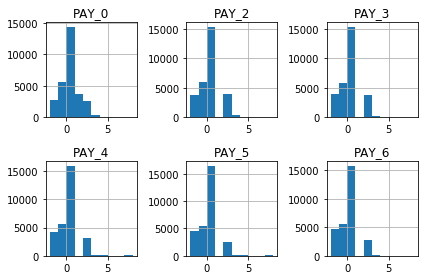

In [6]:
#Let's perform some visualization. 
#Fist, we graph the histograms of pay variables. 
pays=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
fig=plt.figure()
for i, var_name in enumerate(pays.columns):
        ax=fig.add_subplot(2,3,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
fig.tight_layout()  
plt.show()


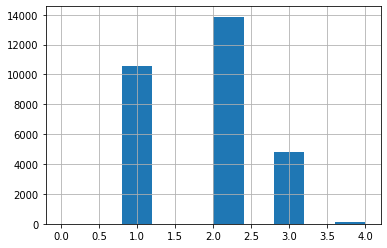

In [7]:
#You can also graph individual histograms using the following command. Let's draw the histogram for EDUCATION 
#Gender and BILL_AMT1
df.EDUCATION.hist()

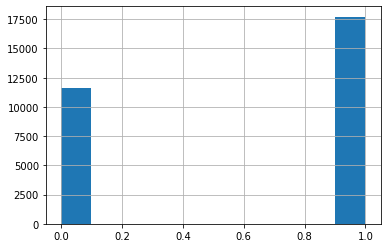

In [8]:
df.SEX.hist()

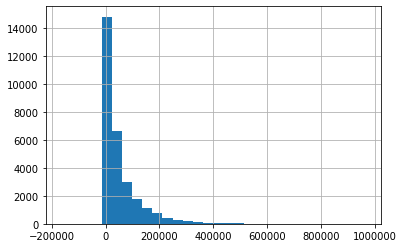

In [9]:
#Let's look at BILL_AMT1 histogram. What is interesting to observe here?
df.BILL_AMT1.hist(bins = 30)

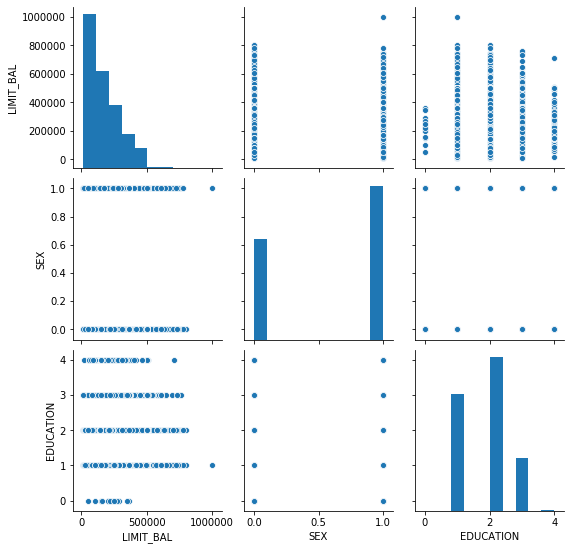

In [10]:
#Seaborn provides a convinient way of having pairplots
train_dataset = df.iloc[:,0:3].copy()
plots = sns.pairplot(train_dataset)


In [11]:
#Exercise 2 --- One line of coding - [1/30]
#Find the total number of observations (accounts) in the dataset with Education of level 4 exactly
#
#----------------------------------
#Write your code bellow

sum(df['EDUCATION']==4)

# or you can get them all using df['EDUCATION'].value_counts()
#----------------------------------







120

In [12]:
#Exercise 3 --- If you use the right command, it is one line of coding otherwise some lines - [2/30]
# For AGE AND PAY_2, find the minimum value; the maximum value; 25%, 50%, 75%, percentiles; mean; 
# and standard deviation. 

#
#----------------------------------
#Write your code bellow

df[['AGE', 'PAY_2']].describe()


#----------------------------------



,AGE,PAY_2
count,29351.000000,29351.000000
mean,35.390174,-0.133215
std,9.176913,1.200839
min,21.000000,-2.000000
25%,28.000000,-1.000000
50%,34.000000,0.000000
75%,41.000000,0.000000
max,79.000000,8.000000


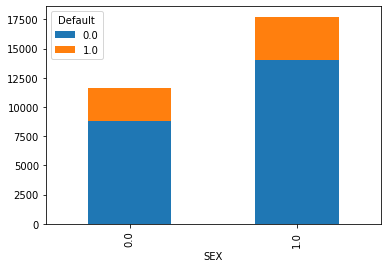

In [13]:
#Let's visually show the number of accounts that has defaulted and non-default versus gender
gender_default=df.groupby(['SEX', 'Default']).size().unstack()
gender_default.plot(kind='bar', stacked = True)


In [14]:
#Exercise 4 --- If you use the right command, it is one line of coding otherwise a few lins - [3/30]
#For each level of education find the percentage of females and percentage of defaults in that level.
#

#
#----------------------------------
#Write your code bellow

df[["EDUCATION", 'SEX', "Default"]].groupby(['EDUCATION']).mean()#.sort_values(by='Default')

#----------------------------------



,SEX,Default
EDUCATION,,
0.0,0.428571,0.000000
1.0,0.589559,0.192027
2.0,0.617032,0.236948
3.0,0.594101,0.251350
4.0,0.658333,0.058333


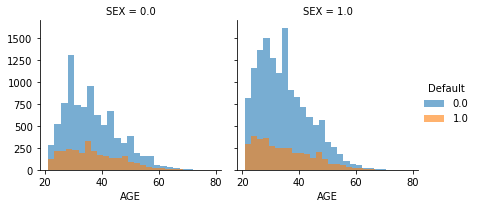

In [15]:
#Some more visualization
#What are your observations?
g = sns.FacetGrid(df, col='SEX', hue='Default')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) 
g.add_legend()

In [16]:
#Suppose that we are in August and we would like to predict the amount of bill statement in September. 
#First, we choose the appropriate features and target variables; think why these features are chosen.
#Feature selection is not our concern for now, so don't worry for now. 
features=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
          'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
y=df['BILL_AMT1']


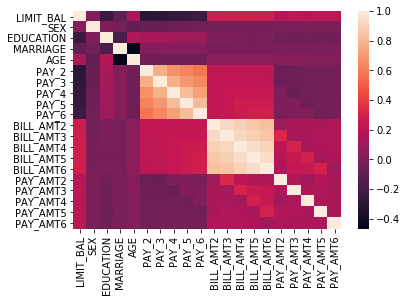

In [17]:
#Having a correlation matrix and its visualizations are always interesting. Fortunately seaborn make that very easy.
#See which features are heavily correclated.
sns.heatmap(df[features].corr(), annot = False, fmt='.1g')


In [18]:
#We can use StandardScaler of Scikit-learn to do mean normalization. Note that the output is a NumPy array
scaler = StandardScaler()
print(scaler.fit_transform(df[features]))

#Exercise 5 --- one or two lines of coding - [2/30]
# In this exercise, do mean normalization for features of dataset df, 
#but you have to only use NumPy. You should get the same result as StandardScaler


#
#----------------------------------
#Write your code bellow

np.array((df[features]-np.mean(df[features],axis=0))/np.std(df[features],axis=0))

#----------------------------------



[[-1.14074381  0.81057483  0.26386607 ... -0.31410345 -0.31636945
  -0.29404988]
 [-0.37137471  0.81057483  0.26386607 ... -0.24895763 -0.31636945
  -0.18082051]
 [-0.60218544  0.81057483  0.26386607 ... -0.24895763 -0.25040439
  -0.01097645]
 ...
 [-1.0638069  -1.23369239  0.26386607 ... -0.04049101 -0.18443932
  -0.11854435]
 [-0.67912235 -1.23369239  1.66969888 ... -0.1886326   3.17740412
  -0.19191699]
 [-0.90993308 -1.23369239  0.26386607 ... -0.24895763 -0.25040439
  -0.23743519]]


array([[-1.14074381,  0.81057483,  0.26386607, ..., -0.31410345,
        -0.31636945, -0.29404988],
       [-0.37137471,  0.81057483,  0.26386607, ..., -0.24895763,
        -0.31636945, -0.18082051],
       [-0.60218544,  0.81057483,  0.26386607, ..., -0.24895763,
        -0.25040439, -0.01097645],
       ...,
       [-1.0638069 , -1.23369239,  0.26386607, ..., -0.04049101,
        -0.18443932, -0.11854435],
       [-0.67912235, -1.23369239,  1.66969888, ..., -0.1886326 ,
         3.17740412, -0.19191699],
       [-0.90993308, -1.23369239,  0.26386607, ..., -0.24895763,
        -0.25040439, -0.23743519]])

In [19]:
#For our analysis, we divide the dataset into 80 percdent training, 20% testing (no validation set for now)

data=df[features]
default_seed = 1
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2,
                                                                  random_state=default_seed) 


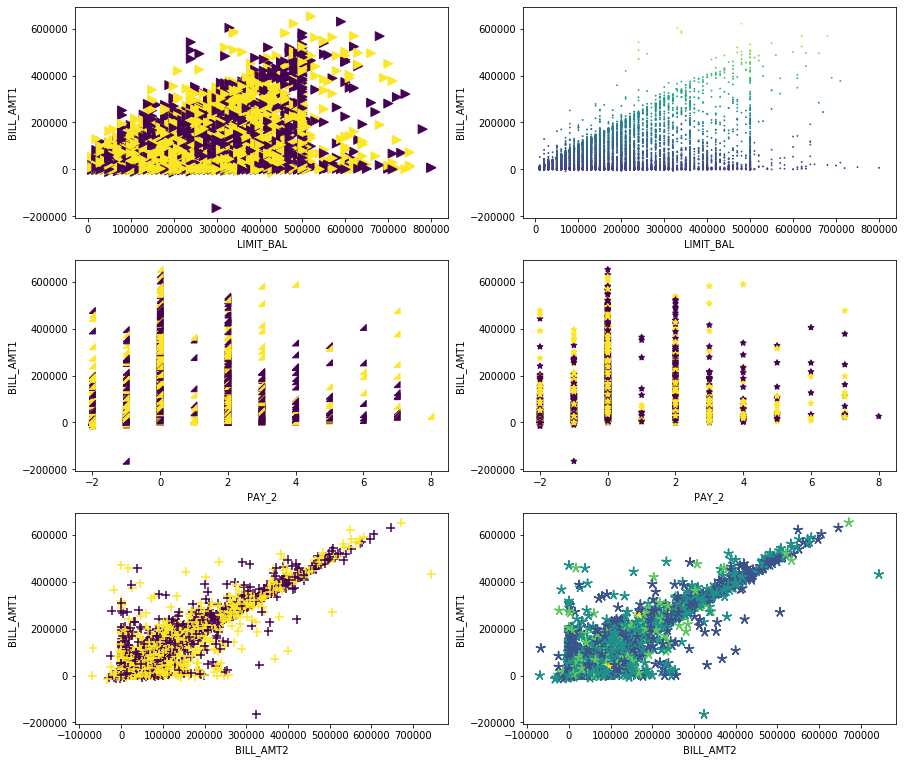

In [20]:
# Some scatter plots. Try to understand these plots. Can you detect some linear patterns?
# Can you detect different classes?

plt.subplots_adjust(left=0.1, bottom=0.51, top=3, right=2)

plt.subplot(321)
plt.scatter(x_train['LIMIT_BAL'],y_train,c=x_train['SEX'], s=80, marker=">")

plt.xlabel("LIMIT_BAL")
plt.ylabel("BILL_AMT1")


plt.subplot(322)
plt.scatter(x_train['LIMIT_BAL'], y_train,x_train['MARRIAGE'], c=y_train,marker=(5, 0))

plt.xlabel("LIMIT_BAL")
plt.ylabel("BILL_AMT1")


verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x_train['PAY_2'], y_train,c=x_train['SEX'],marker=verts)

plt.xlabel("PAY_2")
plt.ylabel("BILL_AMT1")


plt.subplot(324)
plt.scatter(x_train['PAY_2'],y_train, c=x_train['MARRIAGE'],  marker=(5, 1))

plt.xlabel("PAY_2")
plt.ylabel("BILL_AMT1")


plt.subplot(325)
plt.scatter(x_train['BILL_AMT2'], y_train, s=80, c=x_train['SEX'], marker='+')

plt.xlabel("BILL_AMT2")
plt.ylabel("BILL_AMT1")


plt.subplot(326)
plt.scatter(x_train['BILL_AMT2'],y_train,s=80, c=x_train['EDUCATION'], marker=(5, 2))

plt.xlabel("BILL_AMT2")
plt.ylabel("BILL_AMT1")


plt.show()

In [21]:
#First we implement linear regression using Scikit-learn.
#Note that we do not normalize the features here.
x_linear = LinearRegression()
x_linear.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Exercise 6 --- Two or three lines of coding - [2/30]
# In this exercise, using only NumPy calculate MSE on both the training and test datasets. 

#
#----------------------------------
#Write your code bellow


print(np.mean(np.square(x_linear.predict(x_train)-y_train)))
np.mean(np.square(x_linear.predict(x_test)-y_test))
#
#----------------------------------
#Write your code bellow

475151643.60775167


562153457.1234461

In [23]:
#Exercise 7 --- one line of coding - [2/30]
#Obtain the coeffiecents, and store them in an NumPy array called parameters.
#Do not forget the bias parameter.
#
#----------------------------------
#Write your code bellow

parameters = np.concatenate([[x_linear.intercept_],x_linear.coef_])

#----------------------------------

parameters

array([-8.74583128e+02,  1.02274255e-02, -7.60182524e+02,  1.14916065e+03,
        1.44169099e+02, -9.38174997e+00,  3.93330426e+03, -3.12250989e+03,
       -4.09718841e+02, -5.27668844e+01, -4.28319023e+02,  8.76954250e-01,
        7.65507484e-02,  3.46744385e-02,  3.17333887e-03, -6.26056863e-03,
       -4.13123081e-02,  3.13138166e-02,  7.85404901e-02,  4.72852941e-02,
        1.70181107e-02])

In [24]:
#Exercise 8 --- Two or three lines of coding - [4/30]
#Obtain the coeffiecents (parameters) for this LM, but this time use normal equation
#Store them in an NumPy array called parameters
#Your answers should match the one you obtained in the previous exercise

#
#----------------------------------
#Write your code bellow

x_train_new=np.concatenate((np.ones(x_train.shape[0])[np.newaxis].T,np.array(x_train)),axis=1)
np.matmul(np.matmul(np.linalg.inv(np.matmul(np.array(x_train_new).transpose(),np.array(x_train_new)))\
                    ,np.array(x_train_new).transpose()),y_train)

#----------------------------------


parameters

array([-8.74583128e+02,  1.02274255e-02, -7.60182524e+02,  1.14916065e+03,
        1.44169099e+02, -9.38174997e+00,  3.93330426e+03, -3.12250989e+03,
       -4.09718841e+02, -5.27668844e+01, -4.28319023e+02,  8.76954250e-01,
        7.65507484e-02,  3.46744385e-02,  3.17333887e-03, -6.26056863e-03,
       -4.13123081e-02,  3.13138166e-02,  7.85404901e-02,  4.72852941e-02,
        1.70181107e-02])

Text(0.5, 0, 'Truths')

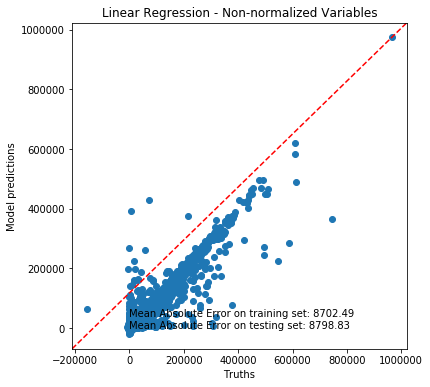

In [25]:
#Let's graph the true values versus the predictions. 
#
y_pred_train = x_linear.predict(x_train)
mae = np.mean(np.abs(y_pred_train-y_train))#median_absolute_error(y_train, y_pred)
string_score = f'Mean Absolute Error on training set: {mae:.2f}'
y_pred_test = x_linear.predict(x_test)
mae = np.mean(np.abs(y_pred_test-y_test))
string_score += f'\nMean Absolute Error on testing set: {mae:.2f}'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred_test)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Linear Regression - Non-normalized Variables')
plt.ylabel('Model predictions')
plt.xlabel('Truths')


In [26]:
#Think about some of the flows of this model

In [27]:
#Exercise 9 --- eight or nine lines of coding - [4/30]
#Repeat the previous LM fitting, but this time using standardized data, more precisely do the following:
#1. Do mean-normalization of the features, call them df_features
#2. Split the data into 80% training and 20% testing use random_state of 1
#3. Fit a linear model with the bias term included
#4. Print the parameters
#5. Calculate the MSE on the test dataset

#
#----------------------------------
#Write your code bellow

scaler = StandardScaler()
df_features=pd.DataFrame(scaler.fit_transform(df[features]),columns=df[features].columns)
default_seed = 1
x_train, x_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2,
                                                                  random_state=default_seed) 
x_linear = LinearRegression()
x_linear.fit(x_train, y_train)
parameters = np.concatenate([[x_linear.intercept_],x_linear.coef_])
print(parameters)
print(np.mean(np.square(x_linear.predict(x_test)-y_test)))
#----------------------------------


[ 5.09812637e+04  1.32932626e+03 -3.71860644e+02  8.17423410e+02
  7.18665406e+01 -8.60940363e+01  4.72318518e+03 -3.74880740e+03
 -4.80376336e+02 -6.00037773e+01 -4.93784327e+02  6.22883512e+04
  5.29971518e+03  2.23005737e+03  1.92967143e+02 -3.73159303e+02
 -9.11239596e+02  5.27521723e+02  1.20561062e+03  7.16823304e+02
  3.00595336e+02]
562153457.1233981


In [28]:
#Comparing to the normalized version, what has changed?

Text(0.5, 0, 'Truths')

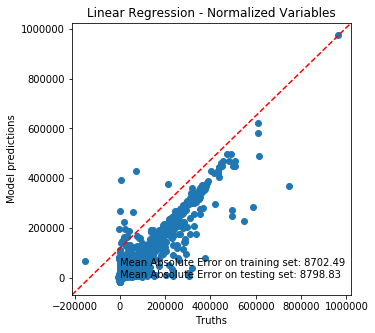

In [29]:
#Let's graph the true values versus the predictions. 

y_pred_train = x_linear.predict(x_train)
mae = np.mean(np.abs(y_pred_train-y_train))
string_score = f'Mean Absolute Error on training set: {mae:.2f}'
y_pred_test = x_linear.predict(x_test)
mae = np.mean(np.abs(y_pred_test-y_test))
string_score += f'\nMean Absolute Error on testing set: {mae:.2f}'

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred_test)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Linear Regression - Normalized Variables')
plt.ylabel('Model predictions')
plt.xlabel('Truths')



In [30]:
#Compare the errro measurment for the two cases of MAE and MSE; what do you concoldue?

Feature: 0, Score: 50981.26369
Feature: 1, Score: 1329.32626
Feature: 2, Score: -371.86064
Feature: 3, Score: 817.42341
Feature: 4, Score: 71.86654
Feature: 5, Score: -86.09404
Feature: 6, Score: 4723.18518
Feature: 7, Score: -3748.80740
Feature: 8, Score: -480.37634
Feature: 9, Score: -60.00378
Feature: 10, Score: -493.78433
Feature: 11, Score: 62288.35122
Feature: 12, Score: 5299.71518
Feature: 13, Score: 2230.05737
Feature: 14, Score: 192.96714
Feature: 15, Score: -373.15930
Feature: 16, Score: -911.23960
Feature: 17, Score: 527.52172
Feature: 18, Score: 1205.61062
Feature: 19, Score: 716.82330
Feature: 20, Score: 300.59534


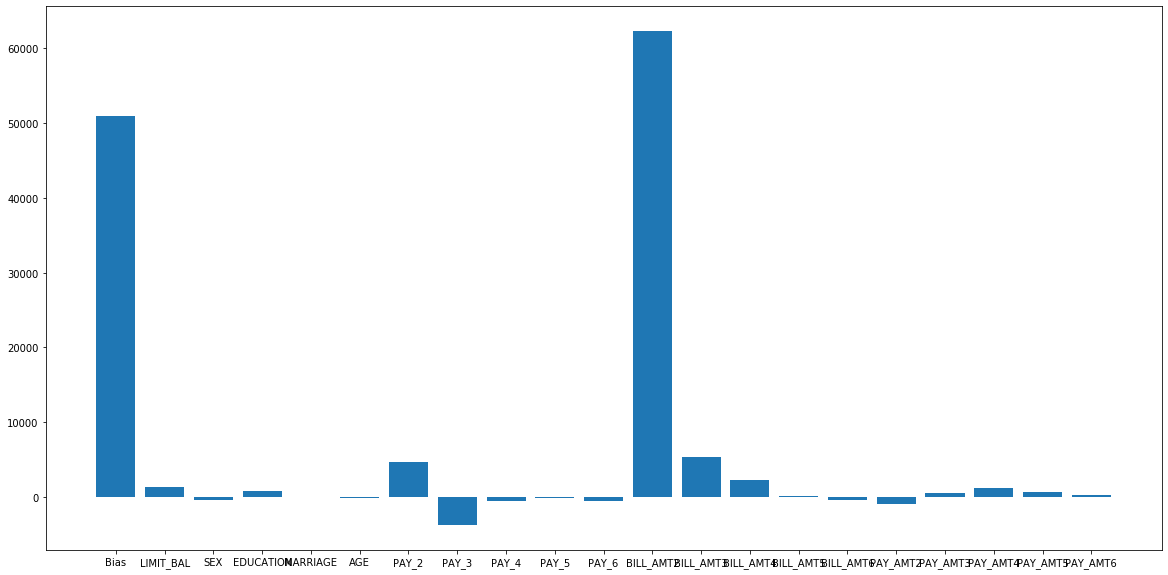

In [33]:
#Exercise 10 --- nine or 10 lines of coding - [4/30]

#One advantage of LMs is their easy interpretations. In these models, the importance of a feature
#is defined as the corresponding coeifficient of that feature in the LM. 
#Calculate feature importance for the mean-normalized features, print them, and graph them.
#You can see the results below.

#
#----------------------------------
#Write your code bellow

importance = parameters
b=['Bias']
features_n=b+features

ind = np.arange(len(features_n)) 
# summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ind, features_n)

plt.show()

#----------------------------------

Exercise 11 --- (170 words MAX) (Non-coding) - [4\/30]
Look at the feature importance graph in thea bove. 
1. Which feature(s) is(are) the most important ones.
2. Suppose that we increase one of these variables by one unit. Interpret the feature importance in this case.


#----------------------------------

Write your answer below:

It is interesting to note that the bias and BILL_AMT2 are the most important ones here. BILL_AMT2 is the amount of the bill statement in August which is a month before our prediciton. This actually makes sense as it should be correlated to the bill statement in September. The high bias term also shows that the features of the model have not successfully captured the noise of the dataset.

When features are normalized in linear regression as above, then their standard deviation is equal to one assuming that the data follows a normal distribuiton.

So a unit increase in the variabel is equal to a unit increase of standard deviation for that feature. Let say 
that the coefficient is $\beta$ then if we increase the feature by one unit basically the value of the target increases
by $\beta(feature+1)=\beta\times feature+\beta.$

Therefore, one unit deviation from a feature, can increase (or deviate) the value of the taret value by $\beta$ amount.

Note that this interpretation is valid when the features are standardized by mean normalization. Some assumptions
are in force like the data is genrated by normal distirubiton. 

#----------------------------------
